In [3]:
#Import required libraries
import numpy as np
from scipy.integrate import solve_ivp #Integrating function
import matplotlib.pyplot as plt #Plotting library

#Inital Conditions
Y = [-1,#x1
      0,#y1
      1 ,#x2
      0,#y2
      0,#x3
      0,#y3
     
      0,#vx1
      1,#vy1
      0,#vx2
      -1,#vy2
      0,#vx3
      0] #vy3

In [4]:
def Planets(t, y):
    f = np.zeros(12)
    f[0] = y[6]
    f[1] = y[7]
    f[2] = y[8]
    f[3] = y[9]
    f[4] = y[10]
    f[5] = y[11]
    
    f[6] = -(y[0]-y[2])/(((y[0]-y[2])**2+(y[1]-y[3])**2)**(3/2)) \
           -(y[0]-y[4])/(((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2))
           
    f[7] = -(y[1]-y[3])/(((y[0]-y[2])**2+(y[1]-y[3])**2)**(3/2)) \
           -(y[1]-y[5])/(((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2))
                     
    f[8] = -(y[2]-y[0])/(((y[2]-y[0])**2+(y[3]-y[1])**2)**(3/2)) \
           -(y[2]-y[4])/(((y[2]-y[4])**2+(y[3]-y[5])**2)**(3/2))
           
    f[9] = -(y[3]-y[1])/(((y[2]-y[0])**2+(y[3]-y[1])**2)**(3/2)) \
           -(y[3]-y[5])/(((y[2]-y[4])**2+(y[3]-y[5])**2)**(3/2))
                     
    f[10]= -(y[4]-y[0])/(((y[4]-y[0])**2+(y[5]-y[1])**2)**(3/2)) \
           -(y[4]-y[2])/(((y[4]-y[2])**2+(y[5]-y[3])**2)**(3/2))
          
    f[11]= -(y[5]-y[1])/(((y[4]-y[0])**2+(y[5]-y[1])**2)**(3/2)) \
           -(y[5]-y[3])/(((y[4]-y[2])**2+(y[5]-y[3])**2)**(3/2))    
           
    return(f)

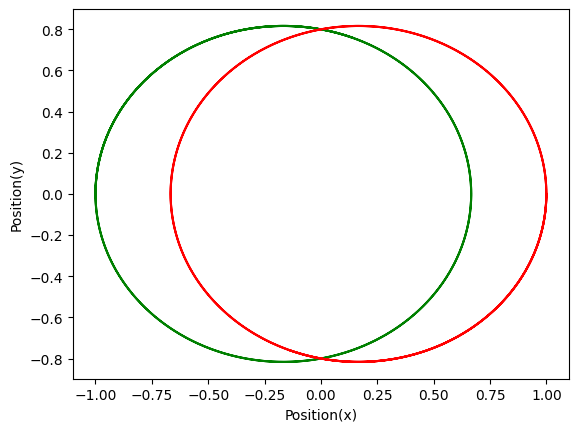

In [5]:
N = 10000
T = 0.001 #N*T=10
t = np.linspace(0,N*T,N) # Time is defined between 0 and N*T for N number of samples
solution = solve_ivp(fun = Planets, t_span = [0,N*T], y0 = Y, t_eval = t, rtol = 1e-10)

#Plotting the evolution in position with respect to time
plt.plot(solution.y[0],solution.y[1],'-g') #(x1, y1) Planet 1 in green
plt.plot(solution.y[2],solution.y[3],'-r') #(x2, y2) Planet 2 in red
plt.plot(solution.y[4],solution.y[5],'-b') #(x3, y3) Planet 3 in blue
plt.ylabel("Position(y)")
plt.xlabel("Position(x)")
plt.show()